# Loan Pay Back Prediction

Here are what the columns represent:

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## I. Data

In [64]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
data_describe=pd.DataFrame()

data_describe['Data Features'] = df.columns

dataType,null,unique,uniqueSample=[],[],[],[]
for i in df.columns:
    dataType.append(df[i].dtype)
    null.append(df[i].isna().sum())
    unique.append(len(df[i].unique()))
    uniqueSample.append(df[i].sample(2, replace=False).values)
    
data_describe['Data Type']=dataType
data_describe['Missing Values']=null
data_describe['Missing Values Percentage']=round(data_describe['Missing Values']/len(df)*100,2)
data_describe['Unique Values']=unique
data_describe['Unique Sample']=uniqueSample

data_describe

,Data Features,Data Type,Missing Values,Missing Values Percentage,Unique Values,Unique Sample
0,credit.policy,int64,0,0.0,2,"[1, 0]"
1,purpose,object,0,0.0,7,"[debt_consolidation, small_business]"
2,int.rate,float64,0,0.0,249,"[0.0907, 0.1461]"
3,installment,float64,0,0.0,4788,"[312.23, 132.66]"
4,log.annual.inc,float64,0,0.0,1987,"[10.08580911, 10.91508846]"
5,dti,float64,0,0.0,2529,"[2.92, 13.6]"
6,fico,int64,0,0.0,44,"[737, 687]"
7,days.with.cr.line,float64,0,0.0,2687,"[3390.041667, 2880.0]"
8,revol.bal,int64,0,0.0,7869,"[6459, 16979]"
9,revol.util,float64,0,0.0,1035,"[78.0, 5.5]"


## II. Exploratory Data Analysis

### 1. Categorical Columns Exploration

Categorical columns in this dataset are credit.policy, purpose, and not.fully.paid.

#### A. Credit Policy

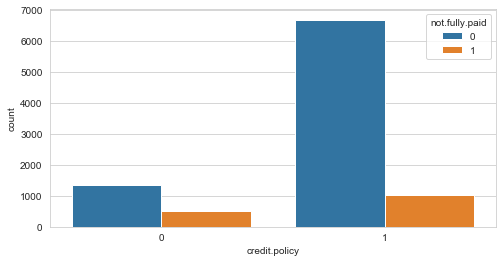

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='credit.policy', hue='not.fully.paid')
plt.show()

In [15]:
percentage = {}
for i in df['credit.policy'].value_counts(ascending=False).index:
    percentage[i] = (len(df[(df['credit.policy']==i) & (df['not.fully.paid']==1)]) / len(df[df['credit.policy']==i])) * 100
pd.DataFrame(percentage, index=['percentage']).transpose()

,percentage
1,13.151751
0,27.783726


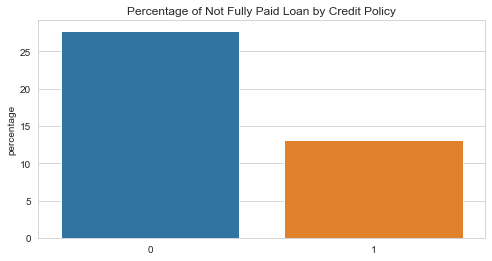

In [16]:
plt.figure(figsize=(8,4))
sns.barplot(x=pd.DataFrame(percentage, index=['percentage']).transpose().index, y=pd.DataFrame(percentage, index=['percentage']).transpose()['percentage'])
plt.title('Percentage of Not Fully Paid Loan by Credit Policy')
plt.show()

The value of credit policy is 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise. Based on the graph, we can conclude that the customers not meeting the criteria of Lending Club tend to not fully pay back their loan.

#### B. Purpose

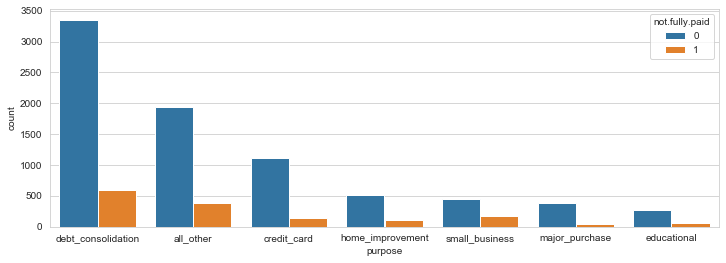

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='purpose', hue='not.fully.paid', order=df['purpose'].value_counts(ascending=False).index)
plt.show()

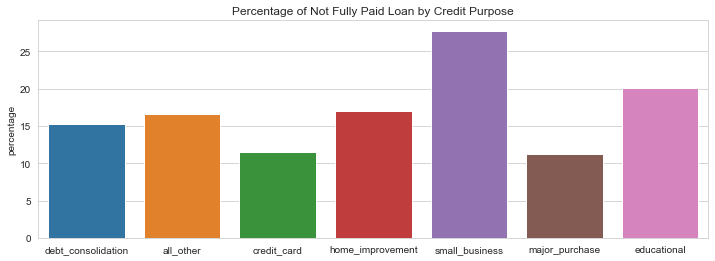

In [53]:
percentage = {}
for i in df['purpose'].value_counts(ascending=False).index:
    percentage[i] = (len(df[(df['purpose']==i) & (df['not.fully.paid']==1)]) / len(df[df['purpose']==i])) * 100

plt.figure(figsize=(12,4))
sns.barplot(x=pd.DataFrame(percentage, index=['percentage']).transpose().index, y=pd.DataFrame(percentage, index=['percentage']).transpose()['percentage'])
plt.title('Percentage of Not Fully Paid Loan by Credit Purpose')
plt.show()

The above graph showed that small business purpose has the highest probability to not fully paid.

### 2. Numerical Columns Exploration

Numerical columns in this dataset are int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, and pub.rec.

#### A. Interest Rate

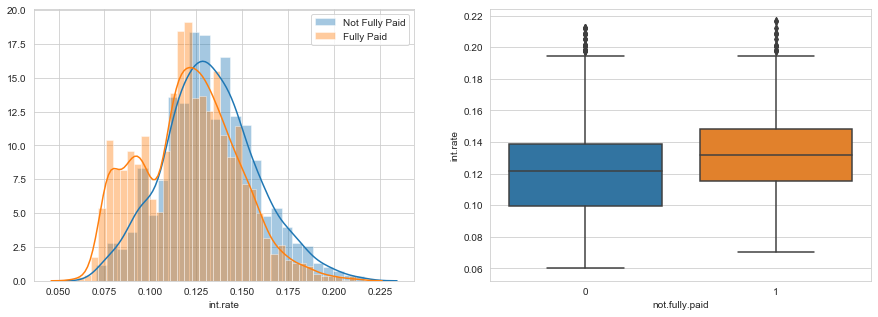

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df[df['not.fully.paid']==1]['int.rate'], label='Not Fully Paid')
sns.distplot(df[df['not.fully.paid']==0]['int.rate'], label='Fully Paid')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='not.fully.paid', y='int.rate')


plt.show()

It is shown that loans with higher interest rate have more probability to not fully paid.

#### B. Installment

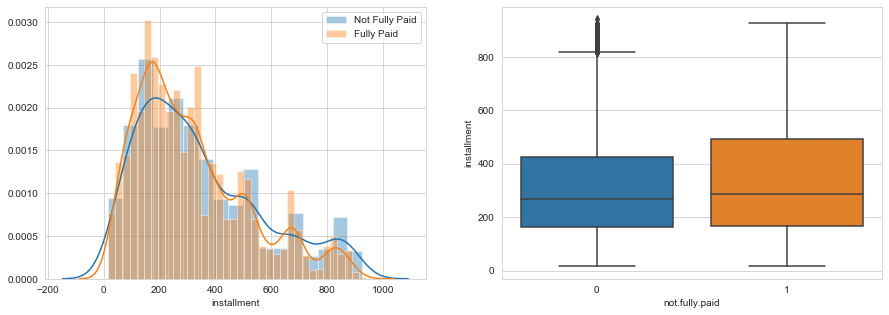

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df[df['not.fully.paid']==1]['installment'], label='Not Fully Paid')
sns.distplot(df[df['not.fully.paid']==0]['installment'], label='Fully Paid')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='not.fully.paid', y='installment')

plt.show()

Customers that have higher monthly installment tend to not fully pay back.

#### C. Annual Income

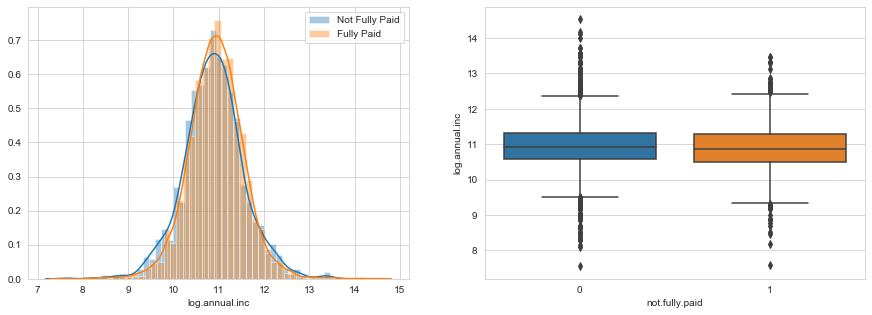

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df[df['not.fully.paid']==1]['log.annual.inc'], label='Not Fully Paid')
sns.distplot(df[df['not.fully.paid']==0]['log.annual.inc'], label='Fully Paid')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='not.fully.paid', y='log.annual.inc')

plt.show()

It is shown that there is not much difference between loan status of customers with different self-reported annual income.

#### D. Debt to Income Ratio

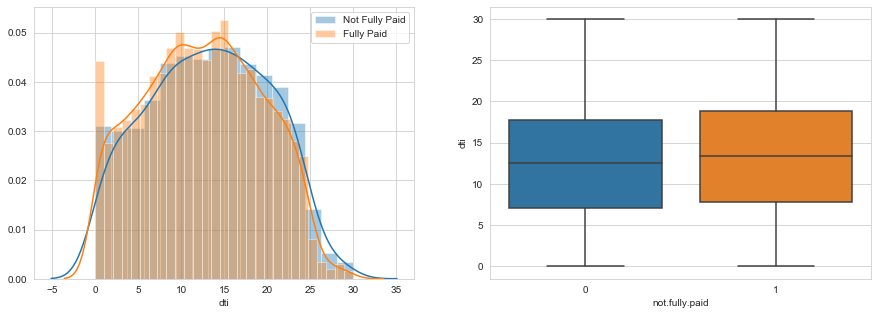

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df[df['not.fully.paid']==1]['dti'], label='Not Fully Paid')
sns.distplot(df[df['not.fully.paid']==0]['dti'], label='Fully Paid')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='not.fully.paid', y='dti')

plt.show()

It is shown that there is not much difference between loan status of customers with different debt-to-income ratio.

#### E. FICO

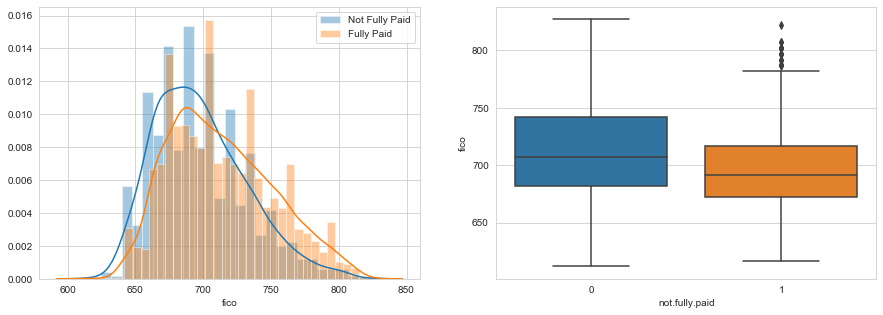

In [42]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df[df['not.fully.paid']==1]['fico'], label='Not Fully Paid')
sns.distplot(df[df['not.fully.paid']==0]['fico'], label='Fully Paid')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='not.fully.paid', y='fico')

plt.show()

Customers with lower FICO score are more likely to not fully pay back their loans.

#### F. The number of days the borrower has had a credit line

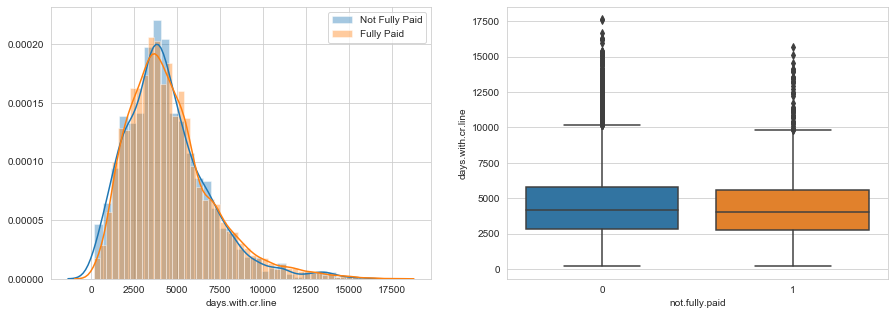

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df[df['not.fully.paid']==1]['days.with.cr.line'], label='Not Fully Paid')
sns.distplot(df[df['not.fully.paid']==0]['days.with.cr.line'], label='Fully Paid')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='not.fully.paid', y='days.with.cr.line')

plt.show()

It is shown that there is not much difference of number of days the borrower has had a credit line between the customers who fully pay and not fully pay.

#### G. Revolving Balance

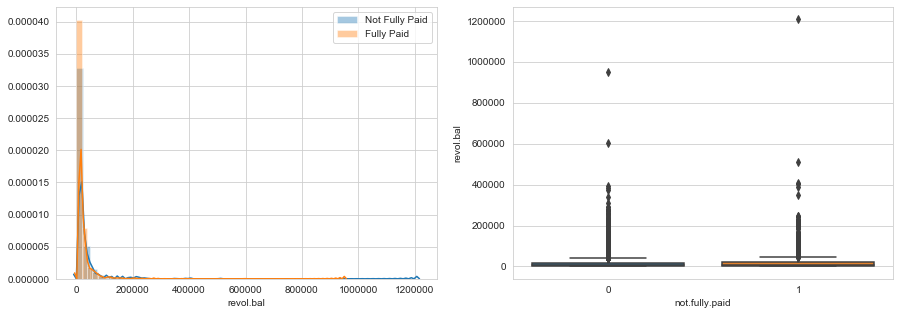

In [45]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df[df['not.fully.paid']==1]['revol.bal'], label='Not Fully Paid')
sns.distplot(df[df['not.fully.paid']==0]['revol.bal'], label='Fully Paid')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='not.fully.paid', y='revol.bal')

plt.show()

In [46]:
df['revol.bal'].describe()

count    9.578000e+03
mean     1.691396e+04
std      3.375619e+04
min      0.000000e+00
25%      3.187000e+03
50%      8.596000e+03
75%      1.824950e+04
max      1.207359e+06
Name: revol.bal, dtype: float64

#### H. Revolving Utilization Rate

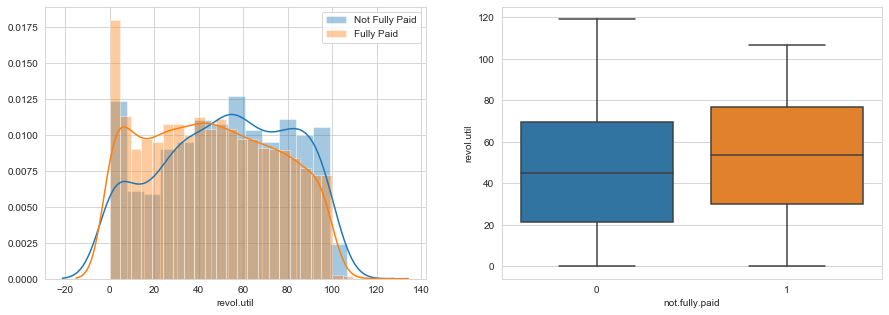

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df[df['not.fully.paid']==1]['revol.util'], label='Not Fully Paid')
sns.distplot(df[df['not.fully.paid']==0]['revol.util'], label='Fully Paid')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='not.fully.paid', y='revol.util')

plt.show()

Customers with higher revolving utilization rate are most likely to not fully pay back their loans.

#### I. Number of inquiries by creditors in the last 6 months.

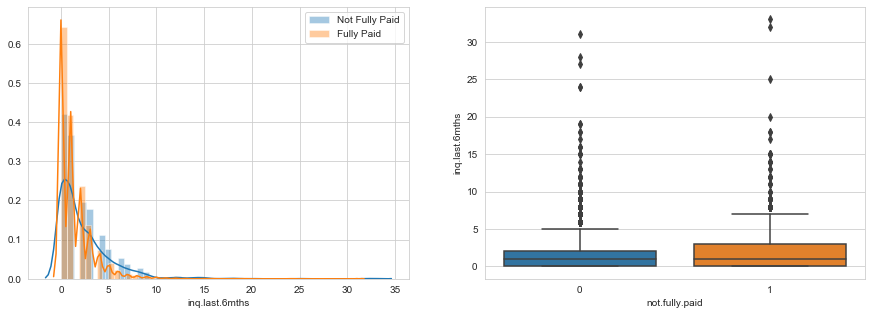

In [48]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df[df['not.fully.paid']==1]['inq.last.6mths'], label='Not Fully Paid')
sns.distplot(df[df['not.fully.paid']==0]['inq.last.6mths'], label='Fully Paid')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='not.fully.paid', y='inq.last.6mths')

plt.show()

#### J. Number of times the borrower had been 30+ days past due on a payment in the past 2 years.

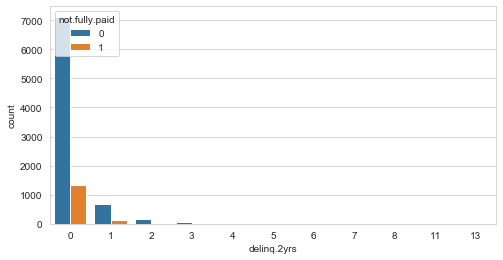

In [50]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='delinq.2yrs', hue='not.fully.paid')
plt.show()

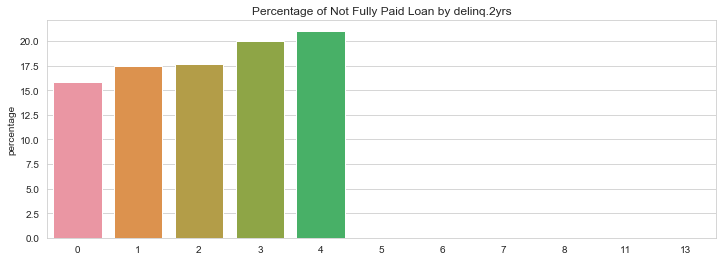

In [54]:
percentage = {}
for i in df['delinq.2yrs'].value_counts(ascending=False).index:
    percentage[i] = (len(df[(df['delinq.2yrs']==i) & (df['not.fully.paid']==1)]) / len(df[df['delinq.2yrs']==i])) * 100

plt.figure(figsize=(12,4))
sns.barplot(x=pd.DataFrame(percentage, index=['percentage']).transpose().index, y=pd.DataFrame(percentage, index=['percentage']).transpose()['percentage'])
plt.title('Percentage of Not Fully Paid Loan by delinq.2yrs')
plt.show()

#### K. Number of derogatory public records

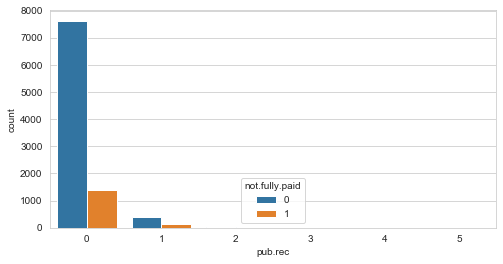

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='pub.rec', hue='not.fully.paid')
plt.show()

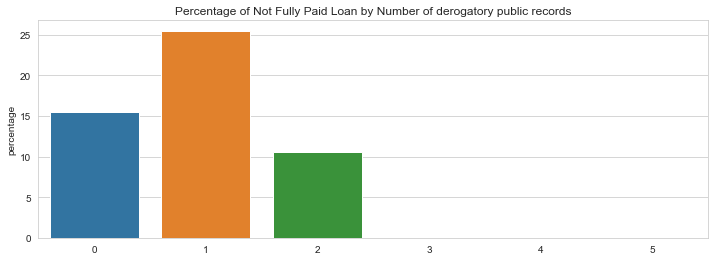

In [56]:
percentage = {}
for i in df['pub.rec'].value_counts(ascending=False).index:
    percentage[i] = (len(df[(df['pub.rec']==i) & (df['not.fully.paid']==1)]) / len(df[df['pub.rec']==i])) * 100

plt.figure(figsize=(12,4))
sns.barplot(x=pd.DataFrame(percentage, index=['percentage']).transpose().index, y=pd.DataFrame(percentage, index=['percentage']).transpose()['percentage'])
plt.title('Percentage of Not Fully Paid Loan by Number of derogatory public records')
plt.show()

### 3. Target Column Exploration

In [58]:
df['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

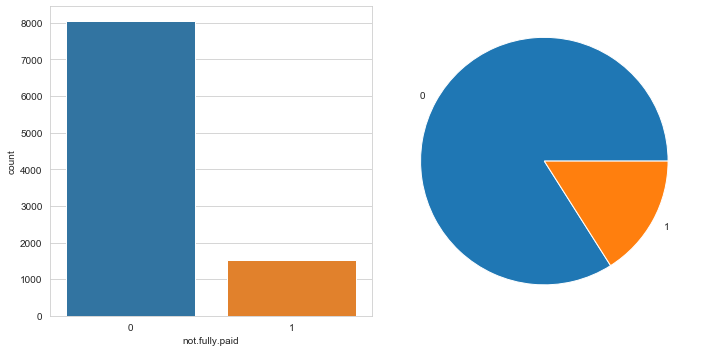

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='not.fully.paid')

plt.subplot(1,2,2)
plt.pie(df['not.fully.paid'].value_counts().values, labels=df['not.fully.paid'].value_counts().index,)

plt.tight_layout()
plt.show()



On the diagram we see that counts for fully paid and not fully paid values for target column are imbalance. Therefore, later we will use SMOTE to overcome the oversampled data.

### 4. Correlation Ratio

In [63]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

Text(0, 0.5, 'Parameter(s)')

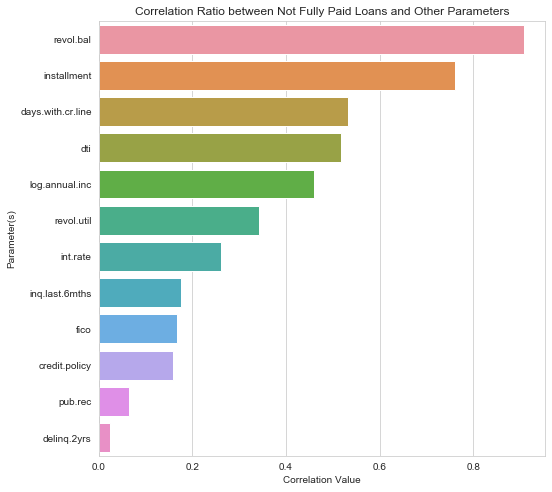

In [67]:
lis = []
for i in df.drop(['not.fully.paid', 'purpose'], axis=1).columns:
    lis.append([i,correlation_ratio(df[i], df['not.fully.paid'])])
lis = pd.DataFrame(lis).sort_values(1, ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y=lis[0], x=lis[1])
plt.title('Correlation Ratio between Not Fully Paid Loans and Other Parameters')
plt.xlabel('Correlation Value')
plt.ylabel('Parameter(s)')

## II. Feature Engineering

In [68]:
df = pd.get_dummies(df, drop_first=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## IV. Machine Learning

### 1. Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### 2. SMOTE

In [73]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_sm, y_sm = sm.fit_sample(X_train, y_train)

### 3. Fitting Base Model

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import warnings
warnings.filterwarnings('ignore')

In [75]:
def score_algorithm(model):
    clf = model()
    # Fitting
    clf.fit(X_sm, y_sm)
    # Evaluating Train Data
    prediction_train = clf.predict(X_sm)
    precision_train = precision_score(y_sm, prediction_train)
    recall_train = precision_score(y_sm, prediction_train)
    accuracy_train = accuracy_score(y_sm, prediction_train)
    # Evaluating Test Data
    prediction_test = clf.predict(X_test)
    precision_test = precision_score(y_test, prediction_test)
    recall_test = recall_score(y_test, prediction_test)
    accuracy_test = accuracy_score(y_test, prediction_test)
    all_score = [precision_train,  recall_train, accuracy_train, precision_test, recall_test, accuracy_test]
    return all_score

In [76]:
algorithm = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, SVC, KNeighborsClassifier, MLPClassifier, GaussianNB]
all_score=[]
for item in algorithm:
    score = score_algorithm(item)
    all_score.append(score)

In [77]:
df_score = pd.DataFrame(all_score, index =['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'SVC', 'KNeighborsClassifier', 'MLPClassifier', 'GaussianNB'], columns=['precision_train',  'recall_train', 'accuracy_train', 'precision_test', 'recall_test', 'accuracy_test'])
df_score

,precision_train,recall_train,accuracy_train,precision_test,recall_test,accuracy_test
LogisticRegression,0.563036,0.563036,0.561819,0.176941,0.529010,0.551670
DecisionTreeClassifier,1.000000,1.000000,1.000000,0.167315,0.293515,0.668580
RandomForestClassifier,1.000000,1.000000,1.000000,0.253012,0.215017,0.782881
GradientBoostingClassifier,0.809330,0.809330,0.796325,0.240741,0.354949,0.730167
SVC,0.577810,0.577810,0.525226,0.175862,0.174061,0.748956
KNeighborsClassifier,0.775413,0.775413,0.834553,0.171233,0.426621,0.596555
MLPClassifier,0.549705,0.549705,0.587745,0.149845,0.825939,0.256785
GaussianNB,0.641470,0.641470,0.625895,0.200855,0.481229,0.627871


Based on Recall Score, the top 3 models are:

1. MLP Classifier
1. Logistic Regression
1. Gaussian Naive Bayes

### 4. Hyperparameter Tuning for MLP Classifier

In [78]:
from sklearn.model_selection import GridSearchCV

In [151]:
from sklearn.metrics import make_scorer
recall = make_scorer(recall_score, pos_label=1, average='binary')

In [161]:
search_mlp = GridSearchCV(estimator=MLPClassifier(random_state=101),
                    param_grid= {
                        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                        'activation': ['tanh', 'relu', 'logistic'],
                        'solver': ['sgd', 'adam', 'lbfgs'],
                        'alpha': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
                        'learning_rate': ['constant','adaptive']
                    }, scoring=['recall', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [162]:
search_mlp.fit(X_sm,y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
                         'hidden_layer_sizes

In [163]:
search_mlp.best_params_, search_mlp.best_score_

({'activation': 'relu',
  'alpha': 0.07,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'solver': 'adam'},
 0.7538586451631754)

In [170]:
mlp = MLPClassifier(activation='relu',
  alpha=0.07,
  hidden_layer_sizes =(100,),
  learning_rate='constant',
  solver='adam',
  random_state=101)

In [171]:
mlp.fit(X_sm, y_sm)

MLPClassifier(activation='relu', alpha=0.07, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=101, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [172]:
mlp_pred = mlp.predict(X_test)
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1623
           1       0.19      0.15      0.17       293

    accuracy                           0.77      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.75      0.77      0.76      1916



In [144]:
recall_score(y_test, mlp_pred, pos_label=1, average='binary')

0.0

### 5. Hyperparameter Tuning for Logistic Regression

In [164]:
search_logreg = GridSearchCV(estimator=LogisticRegression(), 
                             param_grid= {
                                'penalty' : ['l1', 'l2'],
                                'C' : np.logspace(-4,4,20)
                             }, 
                             scoring=['recall', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [165]:
search_logreg.fit(X_sm,y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.636...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [166]:
search_logreg.best_params_, search_logreg.best_score_

({'C': 1.623776739188721, 'penalty': 'l2'}, 0.6165456696039001)

In [173]:
logreg = LogisticRegression(penalty='l2',C=1.623776739188721)

In [174]:
logreg.fit(X_sm, y_sm)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
logreg_pred = logreg.predict(X_test)
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.87      0.56      0.68      1623
           1       0.18      0.53      0.27       293

    accuracy                           0.55      1916
   macro avg       0.52      0.54      0.47      1916
weighted avg       0.76      0.55      0.61      1916



### 6. Hyperparameter Tuning for Gaussian Naive Bayes

In [167]:
search_nb = GridSearchCV(estimator=GaussianNB(), 
                             param_grid= {
                                'var_smoothing': np.logspace(0,-9, num=100)
                             }, 
                             scoring=['recall', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [168]:
search_nb.fit(X_sm,y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.579...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit='roc_auc', return_train_score=False,
             scoring=['recall', 'roc_auc'], verbose=0)

In [169]:
search_nb.best_params_, search_nb.best_score_

({'var_smoothing': 1e-09}, 0.6773590377256135)

In [176]:
nb = GaussianNB(var_smoothing=1e-09)

In [177]:
nb.fit(X_sm, y_sm)

GaussianNB(priors=None, var_smoothing=1e-09)

In [178]:
nb_pred = logreg.predict(X_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.87      0.56      0.68      1623
           1       0.18      0.53      0.27       293

    accuracy                           0.55      1916
   macro avg       0.52      0.54      0.47      1916
weighted avg       0.76      0.55      0.61      1916

